COSAS POR HACER

1 REORDENAR LAS TABLAS DE A√ëO 2012

2 CAMBIARLE LOS NOMBRES A LA SEGUNDA TABLA

3 SEPARAR LOS ELEMENTOS EN PERIODO A SEMANA Y PERIODO

4 ELIMINAR ELEMENTOS DA√ëADOS Y NULOS

POSDATA: AVISARLE AL SERNAPESCA QUE NO ENTIENDO QUE ACS ES EL MODIF DESCANSO 2 :)


In [1]:
#Sector Pinox
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk


archivo = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx')
# 'archivo' already contains the excel data, access sheets directly
df = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx', sheet_name="2014-2024")  # Changed to read the original file
df2 = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx', sheet_name="2012-2013") # Changed to read the original file
archivo.info()
print(df.head())
archivo.describe()
print(df2.head())
archivo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137143 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   C√≥digo Centro            137143 non-null  object 
 1   semana                   137143 non-null  int64  
 2   A√±o                      137143 non-null  int64  
 3   Regi√≥n                   137143 non-null  object 
 4   ACS                      137143 non-null  object 
 5   Especie                  137143 non-null  object 
 6   Prom. Hembras Ov√≠geras   137143 non-null  float64
 7   Prom. Adultos M√≥viles    137143 non-null  float64
 8   Prom. Juveniles          137143 non-null  float64
 9   Prom. Par√°sitos Totales  137143 non-null  float64
 10  Temperatura              137143 non-null  object 
 11  Salinidad                137143 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 12.6+ MB
  C√≥digo Centro  semana   A√±o    Regi√≥n       A

C√≥digo Centro  semana   A√±o    Regi√≥n       ACS               Especie  \
0        100068       1  2014  X REGION  ACS 10 A  Salmon Del Atlantico   
1        100104       1  2014  X REGION  ACS 10 A       Trucha Arcoiris   
2        100176       1  2014  X REGION  ACS 17 A       Trucha Arcoiris   
3        100182       1  2014  X REGION   ACS 3 B  Salmon Del Atlantico   
4        100189       1  2014  X REGION   ACS 3 B       Trucha Arcoiris   

   Prom. Hembras Ov√≠geras  Prom. Adultos M√≥viles  Prom. Juveniles  \
0                   0.750                  1.400            2.900   
1                   4.650                  4.275            3.275   
2                   2.600                  2.900            2.600   
3                   1.200                  1.250            0.925   
4                   4.575                  3.375            2.575   

   Prom. Par√°sitos Totales Temperatura Salinidad  
0                 5.050000        13.1        32  
1                12.200001        11.8        35  
2                 8.100000        15.6        20  
3                 3.375000          12        32  
4                10.525000        12.8        32

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137143 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   C√≥digo Centro            137143 non-null  object 
 1   semana                   137143 non-null  int64  
 2   A√±o                      137143 non-null  int64  
 3   Regi√≥n                   137143 non-null  object 
 4   ACS                      137143 non-null  object 
 5   Especie                  137143 non-null  object 
 6   Prom. Hembras Ov√≠geras   137143 non-null  float64
 7   Prom. Adultos M√≥viles    137143 non-null  float64
 8   Prom. Juveniles          137143 non-null  float64
 9   Prom. Par√°sitos Totales  137143 non-null  float64
 10  Temperatura              137143 non-null  object 
 11  Salinidad                137143 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 12.6+ MB


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46178 entries, 0 to 46177
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Per√≠odo                     46175 non-null  object 
 1   C√≥igo Centro                46175 non-null  float64
 2   Regi√≥n                      46175 non-null  object 
 3   ACS                         46175 non-null  object 
 4   Especie                     46175 non-null  object 
 5   Temperatura Promedio        46175 non-null  float64
 6   Salinidad Promedio          46175 non-null  float64
 7   Promedio Juv,               46175 non-null  float64
 8   Promedio HO                 46175 non-null  float64
 9   Promedio AM                 46175 non-null  float64
 10  Par√°sitos totales promedio  19378 non-null  float64
 11  Promedio HO+AM              46175 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.2+ MB


In [4]:
# Filtrar filas donde 'ACS' contiene "ACS" y no hay valores " - " en ninguna columna
df_cleaned = df[df['ACS'].str.contains('ACS', na=False)]
df_cleaned = df_cleaned[~df_cleaned.isin(['-']).any(axis=1)]
df_cleaned['Temperatura'] = pd.to_numeric(df_cleaned['Temperatura'], errors='coerce')
df_cleaned['Salinidad'] = pd.to_numeric(df_cleaned['Salinidad'], errors='coerce')

# Verificar el resultado
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 134736 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   C√≥digo Centro            134736 non-null  object 
 1   semana                   134736 non-null  int64  
 2   A√±o                      134736 non-null  int64  
 3   Regi√≥n                   134736 non-null  object 
 4   ACS                      134736 non-null  object 
 5   Especie                  134736 non-null  object 
 6   Prom. Hembras Ov√≠geras   134736 non-null  float64
 7   Prom. Adultos M√≥viles    134736 non-null  float64
 8   Prom. Juveniles          134736 non-null  float64
 9   Prom. Par√°sitos Totales  134736 non-null  float64
 10  Temperatura              134736 non-null  float64
 11  Salinidad                134736 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 13.4+ MB


In [5]:
df_cleaned.to_excel('Archivo1 Limpio.xlsx', index = False)

In [6]:
df2.head()

Per√≠odo  C√≥igo Centro     Regi√≥n       ACS  \
0  Semana 1 (2-ENE-2012 al 8-ENE-2012)      110228.0  XI REGION  ACS 25 B   
1  Semana 1 (2-ENE-2012 al 8-ENE-2012)      110261.0  XI REGION  ACS 25 B   
2  Semana 1 (2-ENE-2012 al 8-ENE-2012)      110714.0  XI REGION  ACS 26 A   
3  Semana 1 (2-ENE-2012 al 8-ENE-2012)      104085.0   X REGION     ACS 8   
4  Semana 1 (2-ENE-2012 al 8-ENE-2012)      110260.0  XI REGION  ACS 25 A   

                  Especie  Temperatura Promedio  Salinidad Promedio  \
0  SALMON PLATEADO O COHO                 12.55                20.0   
1    SALMON DEL ATLANTICO                 12.00                22.0   
2    SALMON DEL ATLANTICO                 12.00                29.0   
3    SALMON DEL ATLANTICO                 15.70                32.0   
4  SALMON PLATEADO O COHO                 11.70                19.0   

   Promedio Juv,  Promedio HO  Promedio AM  Par√°sitos totales promedio  \
0           0.00         0.00         0.00                        0.00   
1           0.00         0.00         0.00                        0.00   
2           1.50         1.12         0.88                        3.50   
3           0.08         0.00         0.00                        0.08   
4           0.00         0.00         0.00                        0.00   

   Promedio HO+AM  
0             0.0  
1             0.0  
2             2.0  
3             0.0  
4             0.0

In [7]:
# Esto calcular√° la suma fila por fila para cada registro en las columnas especificadas
# Completar la columna 'Par√°sitos totales promedio' en df2
df2['Par√°sitos totales promedio'] = df2['Promedio Juv,'] + df2['Promedio HO'] + df2['Promedio AM']

# Verificar el resultado
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46178 entries, 0 to 46177
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Per√≠odo                     46175 non-null  object 
 1   C√≥igo Centro                46175 non-null  float64
 2   Regi√≥n                      46175 non-null  object 
 3   ACS                         46175 non-null  object 
 4   Especie                     46175 non-null  object 
 5   Temperatura Promedio        46175 non-null  float64
 6   Salinidad Promedio          46175 non-null  float64
 7   Promedio Juv,               46175 non-null  float64
 8   Promedio HO                 46175 non-null  float64
 9   Promedio AM                 46175 non-null  float64
 10  Par√°sitos totales promedio  46175 non-null  float64
 11  Promedio HO+AM              46175 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.2+ MB


In [8]:
df_cleaned2 = df2[df2['ACS'].str.contains('ACS', na=False)]
df_cleaned2 = df_cleaned2[~df_cleaned2.isin(['-']).any(axis=1)]
df_cleaned2.rename(columns={'C√≥igo Centro': 'C√≥digo Centro'}, inplace=True)
# Extraer el n√∫mero de la semana y el a√±o de la columna 'Per√≠odo'
df_cleaned2['semana'] = df_cleaned2['Per√≠odo'].str.extract(r'Semana (\d+)').astype(int)
df_cleaned2['A√±o'] = df_cleaned2['Per√≠odo'].str.extract(r'(\d{4})').astype(int)

# Guardar los cambios en un nuevo dataset
df_cleaned22 = df_cleaned2.copy()
# Verificar el resultado
df_cleaned22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45522 entries, 0 to 46177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Per√≠odo                     45522 non-null  object 
 1   C√≥digo Centro               45522 non-null  float64
 2   Regi√≥n                      45522 non-null  object 
 3   ACS                         45522 non-null  object 
 4   Especie                     45522 non-null  object 
 5   Temperatura Promedio        45522 non-null  float64
 6   Salinidad Promedio          45522 non-null  float64
 7   Promedio Juv,               45522 non-null  float64
 8   Promedio HO                 45522 non-null  float64
 9   Promedio AM                 45522 non-null  float64
 10  Par√°sitos totales promedio  45522 non-null  float64
 11  Promedio HO+AM              45522 non-null  float64
 12  semana                      45522 non-null  int64  
 13  A√±o                         455

In [9]:
df_cleaned2.to_excel('Archivo2 Limpio.xlsx', index = False)

In [10]:
df_cleaned2.describe()

C√≥digo Centro  Temperatura Promedio  Salinidad Promedio  Promedio Juv,  \
count   45522.000000          45522.000000        45522.000000   45522.000000   
mean   106907.985545             10.960200           28.984107       2.723362   
std      4571.186536              1.825497            5.085604       6.767838   
min    100054.000000              1.150000            1.000000       0.000000   
25%    102158.000000              9.800000           28.000000       0.220000   
50%    110193.000000             10.700000           31.000000       1.020000   
75%    110586.000000             12.050000           32.000000       2.800000   
max    120128.000000             22.000000           92.000000     295.350000   

        Promedio HO   Promedio AM  Par√°sitos totales promedio  Promedio HO+AM  \
count  45522.000000  45522.000000                45522.000000    45522.000000   
mean       1.828990      1.860366                    6.412718        3.689294   
std        4.175017      3.914468                   13.348841        7.947034   
min        0.000000      0.000000                    0.000000        0.000000   
25%        0.100000      0.150000                    0.690000        0.300000   
50%        0.980000      1.050000                    3.530000        2.100000   
75%        2.400000      2.420000                    7.860000        4.880000   
max      172.850000    155.270000                  466.740000      328.120000   

             semana           A√±o  
count  45522.000000  45522.000000  
mean      26.932296   2012.317407  
std       14.791020      0.465472  
min        1.000000   2012.000000  
25%       14.000000   2012.000000  
50%       27.000000   2012.000000  
75%       40.000000   2013.000000  
max       52.000000   2013.000000

In [11]:
df_cleaned.describe()

semana            A√±o  Prom. Hembras Ov√≠geras  \
count  134736.000000  134736.000000           134736.000000   
mean       26.269067    2018.788943                1.418404   
std        15.075490       3.052937                3.290256   
min         1.000000    2014.000000                0.000000   
25%        13.000000    2016.000000                0.000000   
50%        26.000000    2019.000000                0.450000   
75%        39.000000    2021.000000                1.950000   
max        53.000000    2024.000000              177.899994   

       Prom. Adultos M√≥viles  Prom. Juveniles  Prom. Par√°sitos Totales  \
count          134736.000000    134736.000000            134736.000000   
mean                1.883250         2.395443                 5.697097   
std                 3.947884         5.958211                11.927211   
min                 0.000000         0.000000                 0.000000   
25%                 0.000000         0.000000                 0.050000   
50%                 0.575000         0.525000                 1.900000   
75%                 2.350000         2.375000                 6.925000   
max               171.850006       323.233337               454.440002   

         Temperatura      Salinidad  
count  134736.000000  134736.000000  
mean       11.004845      28.011943  
std         1.935072       5.534747  
min         0.900000       0.700000  
25%        10.000000      26.000000  
50%        11.000000      30.000000  
75%        12.200000      32.000000  
max        22.500000      95.800003

In [12]:
# Contar elementos que contienen "ACS"
acs_count = df_cleaned22['ACS'].str.contains('ACS', na=False).sum()

# Contar elementos que no contienen "ACS"
non_acs_count = len(df_cleaned22) - acs_count

print(f"Elementos con 'ACS': {acs_count}")
print(f"Elementos con otra cosa: {non_acs_count}")

Elementos con 'ACS': 45522
Elementos con otra cosa: 0


In [13]:
# Valores √∫nicos en las columnas Regi√≥n, semana y Especie
regiones_unicas = df['Regi√≥n'].unique()
semanas_unicas = df['semana'].unique()
especies_unicas = df['Especie'].unique()

print("Regiones √∫nicas:", regiones_unicas)
print("Semanas √∫nicas:", semanas_unicas)
print("Especies √∫nicas:", especies_unicas)

# Comprobar si hay datos vac√≠os en la columna 'semana'


Regiones √∫nicas: ['X REGION' 'XI REGION' 'XIV REGION' 'XII REGION' '-']
Semanas √∫nicas: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]
Especies √∫nicas: ['Salmon Del Atlantico' 'Trucha Arcoiris' 'Salmon Plateado O Coho' '-']


In [14]:
import re

# Copia del DataFrame para no modificar el original
df_cleaned2 = df_cleaned2.copy()

# Asegurarse de que la columna 'Per√≠odo' est√© presente en df_cleaned2
if 'Per√≠odo' not in df_cleaned2.columns and 'Per√≠odo' in df2.columns:
    df_cleaned2['Per√≠odo'] = df2['Per√≠odo']

# Extraer semana y a√±o desde el campo "Per√≠odo"
def extraer_semana_anio(periodo):
    match = re.search(r"Semana (\d+).*\b(\d{4})\b", str(periodo))
    if match:
        semana = int(match.group(1))
        anio = int(match.group(2))
        return pd.Series([semana, anio])
    return pd.Series([None, None])

df_cleaned2[['semana', 'A√±o']] = df_cleaned2['Per√≠odo'].apply(extraer_semana_anio)

# Renombrar columnas para que coincidan
df_cleaned2 = df_cleaned2.rename(columns={
    'C√≥igo Centro': 'C√≥digo Centro',
    'Temperatura Promedio': 'Temperatura',
    'Salinidad Promedio': 'Salinidad',
    'Promedio HO': 'Prom. Hembras Ov√≠geras',
    'Promedio AM': 'Prom. Adultos M√≥viles',
    'Promedio Juv,': 'Prom. Juveniles',
    'Par√°sitos totales promedio': 'Prom. Par√°sitos Totales'
})

# Seleccionar solo columnas comunes con df_2014_2024
columnas_comunes = [
    'C√≥digo Centro', 'semana', 'A√±o', 'Regi√≥n', 'ACS', 'Especie',
    'Prom. Hembras Ov√≠geras', 'Prom. Adultos M√≥viles', 'Prom. Juveniles',
    'Prom. Par√°sitos Totales', 'Temperatura', 'Salinidad'
]

df_cleaned2 = df_cleaned2[columnas_comunes]

# Unir los DataFrames
df_cleaned = df_cleaned.rename(columns={'semana': 'semana', 'C√≥digo Centro': 'C√≥digo Centro'})
df_unificado = pd.concat([df_cleaned2, df_cleaned[columnas_comunes]], ignore_index=True)

df_unificado.info()
df_unificado.to_excel('Archivo_Unificado_Limpio.xlsx', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180258 entries, 0 to 180257
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   C√≥digo Centro            180258 non-null  object 
 1   semana                   180258 non-null  int64  
 2   A√±o                      180258 non-null  int64  
 3   Regi√≥n                   180258 non-null  object 
 4   ACS                      180258 non-null  object 
 5   Especie                  180258 non-null  object 
 6   Prom. Hembras Ov√≠geras   180258 non-null  float64
 7   Prom. Adultos M√≥viles    180258 non-null  float64
 8   Prom. Juveniles          180258 non-null  float64
 9   Prom. Par√°sitos Totales  180258 non-null  float64
 10  Temperatura              180258 non-null  float64
 11  Salinidad                180258 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 16.5+ MB


In [15]:
df_unificado.describe()

semana            A√±o  Prom. Hembras Ov√≠geras  \
count  180258.000000  180258.000000           180258.000000   
mean       26.436558    2017.156193                1.522093   
std        15.006885       3.861660                3.539142   
min         1.000000    2012.000000                0.000000   
25%        13.000000    2013.000000                0.000000   
50%        26.000000    2017.000000                0.600000   
75%        39.000000    2020.000000                2.075000   
max        53.000000    2024.000000              177.899994   

       Prom. Adultos M√≥viles  Prom. Juveniles  Prom. Par√°sitos Totales  \
count          180258.000000    180258.000000            180258.000000   
mean                1.877471         2.478255                 5.877818   
std                 3.939474         6.174328                12.305633   
min                 0.000000         0.000000                 0.000000   
25%                 0.000000         0.030000                 0.125000   
50%                 0.700000         0.650000                 2.350000   
75%                 2.375000         2.500000                 7.215000   
max               171.850006       323.233337               466.740000   

         Temperatura      Salinidad  
count  180258.000000  180258.000000  
mean       10.993570      28.257451  
std         1.908087       5.441236  
min         0.900000       0.700000  
25%         9.900000      26.600000  
50%        10.900000      30.000000  
75%        12.100000      32.000000  
max        22.500000      95.800003

In [16]:
# Contar la cantidad de veces que aparece cada elemento en la columna 'Especie'
conteo_especies = df_unificado['Especie'].value_counts()

# Mostrar el resultado
print(conteo_especies)

Especie
Salmon Del Atlantico      112426
SALMON DEL ATLANTICO       29472
Trucha Arcoiris            15128
TRUCHA ARCOIRIS            12537
Salmon Plateado O Coho      7182
SALMON PLATEADO O COHO      3362
SALMON REY O CHINOOK         151
Name: count, dtype: int64


In [17]:

# Crear un diccionario de reemplazo para unificar las especies
reemplazos = {
    'Salmon Del Atlantico': 'Salmon Atlantico',
    'SALMON DEL ATLANTICO': 'Salmon Atlantico',
    'Trucha Arcoiris': 'Trucha Arcoiris',
    'TRUCHA ARCOIRIS': 'Trucha Arcoiris',
    'Salmon Plateado O Coho': 'Salmon Plateado',
    'SALMON PLATEADO O COHO': 'Salmon Plateado',
    'SALMON REY O CHINOOK': 'Salmon Rey'
}

# Reemplazar los valores en la columna 'Especie' usando el diccionario
df_unificado['Especie'] = df_unificado['Especie'].replace(reemplazos)


N√∫mero de filas duplicadas: 16334
      C√≥digo Centro  semana   A√±o     Regi√≥n       ACS           Especie  \
712        103372.0       3  2012   X REGION  ACS 12 A  Salmon Atlantico   
953        110702.0       4  2012  XI REGION  ACS 23 A  Salmon Atlantico   
1716       110205.0       7  2012  XI REGION  ACS 31 B   Trucha Arcoiris   
2398       110553.0      10  2012  XI REGION  ACS 23 C  Salmon Atlantico   
2600       110216.0      11  2012  XI REGION    ACS 34  Salmon Atlantico   
...             ...     ...   ...        ...       ...               ...   
45517      110143.0      52  2012  XI REGION    ACS 27   Salmon Plateado   
45518      102988.0      52  2012   X REGION    ACS 14        Salmon Rey   
45519      100679.0      52  2012   X REGION  ACS 10 B  Salmon Atlantico   
45520      102818.0      52  2012   X REGION   ACS 9 B   Trucha Arcoiris   
45521      110445.0      52  2012  XI REGION  ACS 22 A  Salmon Atlantico   

       Prom. Hembras Ov√≠geras  Prom. Adultos M√≥

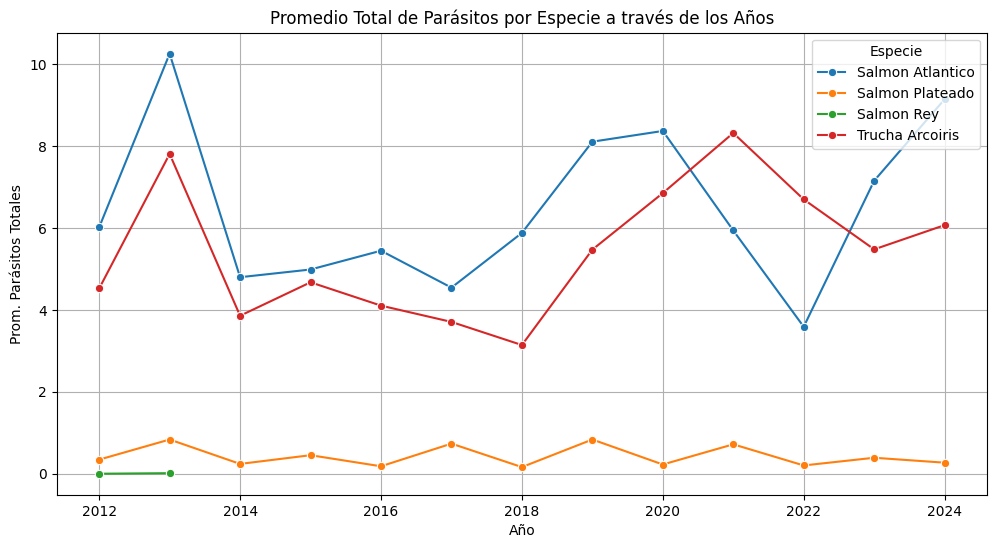

In [21]:
import seaborn as sns

# Agrupar los datos por especie y a√±o, y calcular el promedio de par√°sitos totales
promedios_por_especie = df_unificado.groupby(['A√±o', 'Especie'])['Prom. Par√°sitos Totales'].mean().reset_index()

# Ordenar los datos por a√±o
promedios_por_especie = promedios_por_especie.sort_values(by=['A√±o'])

# Crear la gr√°fica
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_especie, x='A√±o', y='Prom. Par√°sitos Totales', hue='Especie', marker='o')

# Configurar etiquetas y t√≠tulo
plt.title('Promedio Total de Par√°sitos por Especie a trav√©s de los A√±os')
plt.xlabel('A√±o')
plt.ylabel('Prom. Par√°sitos Totales')
plt.legend(title='Especie')
plt.grid(True)
plt.savefig("grafico_personalizadopromedio.png", dpi=300, bbox_inches='tight', transparent=True)

# Mostrar la gr√°fica
plt.show()

In [22]:
#Calcular el promedio de par√°sitos totales y hembras ov√≠geras
promedio_parasitos_totales = df_unificado['Prom. Par√°sitos Totales'].mean()
promedio_hembras_ovigeras = df_unificado['Prom. Hembras Ov√≠geras'].mean()

#Filtrar solo las filas donde la especie es "salmon del atlantico"
salmones = df_unificado[df_unificado['Especie'] == 'Salmon Atlantico']
#Calcular el promedio de hembras ov√≠geras en los salmones
promedio_hembras_ovigeras_salmones = salmones['Prom. Hembras Ov√≠geras'].mean()

#Mostrar el resultado
print(f"Promedio de hembras ov√≠geras en los salmones: {promedio_hembras_ovigeras_salmones:.2f}")
#Calcular el promedio de par√°sitos totales en los salmones
promedio_parasitos_salmones = salmones['Prom. Par√°sitos Totales'].mean()

#Mostrar el resultado
print(f"Promedio de par√°sitos totales en los salmones: {promedio_parasitos_salmones:.2f}")
print(f"Promedio de par√°sitos totales: {promedio_parasitos_totales:.2f}")
print(f"Promedio de hembras ov√≠geras: {promedio_hembras_ovigeras:.2f}")

Promedio de hembras ov√≠geras en los salmones: 1.66
Promedio de par√°sitos totales en los salmones: 6.42
Promedio de par√°sitos totales: 5.88
Promedio de hembras ov√≠geras: 1.52


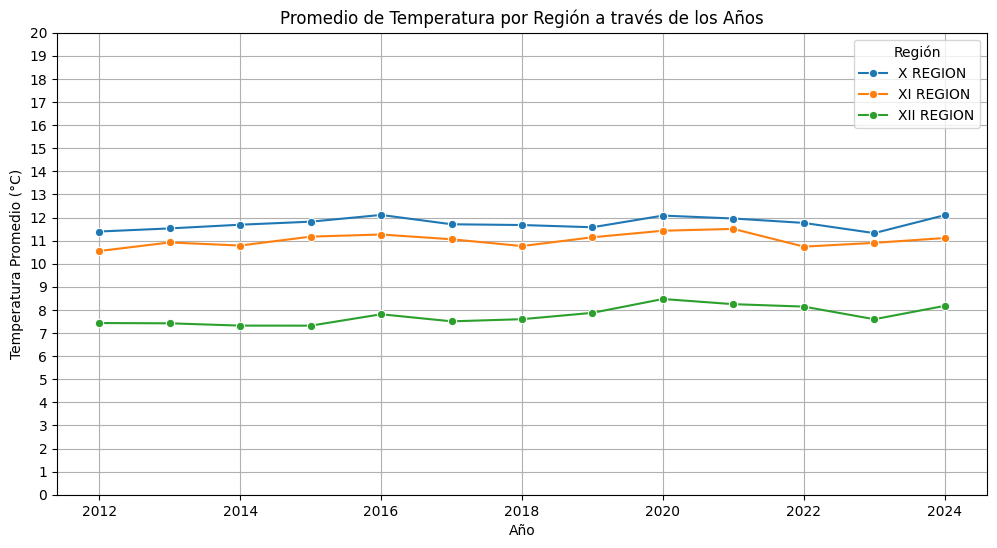

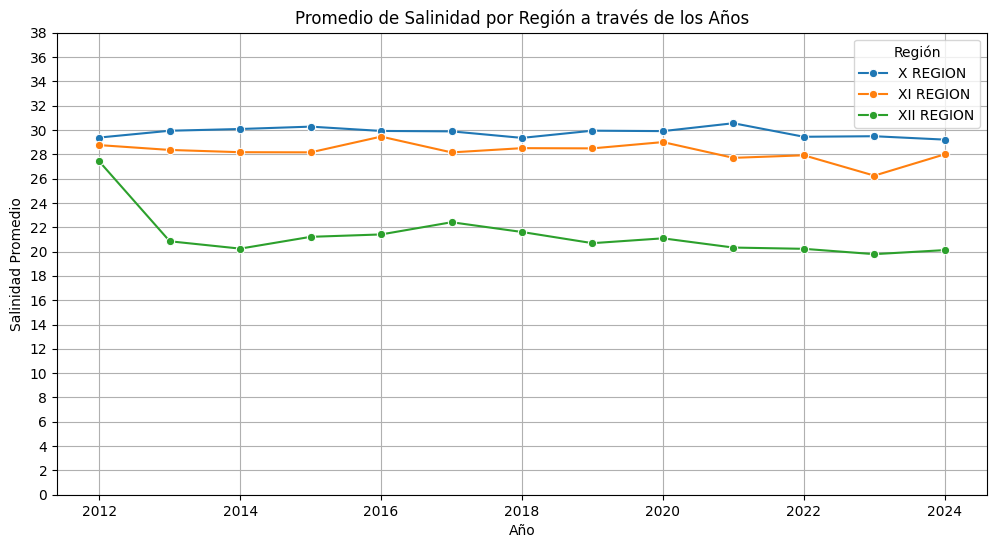

In [23]:
import seaborn as sns

# Agrupar los datos por regi√≥n y a√±o, calculando el promedio de temperatura y salinidad
promedios_por_region_anio = df_unificado.groupby(['A√±o', 'Regi√≥n']).agg({
    'Temperatura': 'mean',
    'Salinidad': 'mean'
}).reset_index()

# Gr√°fico 1: Relaci√≥n de la temperatura por regi√≥n a trav√©s de los a√±os
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_region_anio, x='A√±o', y='Temperatura', hue='Regi√≥n', marker='o')
plt.title('Promedio de Temperatura por Regi√≥n a trav√©s de los A√±os')
plt.xlabel('A√±o')
plt.ylabel('Temperatura Promedio (¬∞C)')
plt.legend(title='Regi√≥n', loc='upper right')
plt.grid(True)
plt.ylim(0, 20)
plt.yticks(range(0, 21, 1))
plt.savefig("grafico_personalizadostemperatura.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Gr√°fico 2: Relaci√≥n de la salinidad por regi√≥n a trav√©s de los a√±os
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_region_anio, x='A√±o', y='Salinidad', hue='Regi√≥n', marker='o')
plt.title('Promedio de Salinidad por Regi√≥n a trav√©s de los A√±os')
plt.xlabel('A√±o')
plt.ylabel('Salinidad Promedio')
plt.legend(title='Regi√≥n', loc='upper right')
plt.grid(True)
plt.ylim(0, 20)
plt.yticks(range(0, 40, 2))
plt.savefig("grafico_salinidad.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


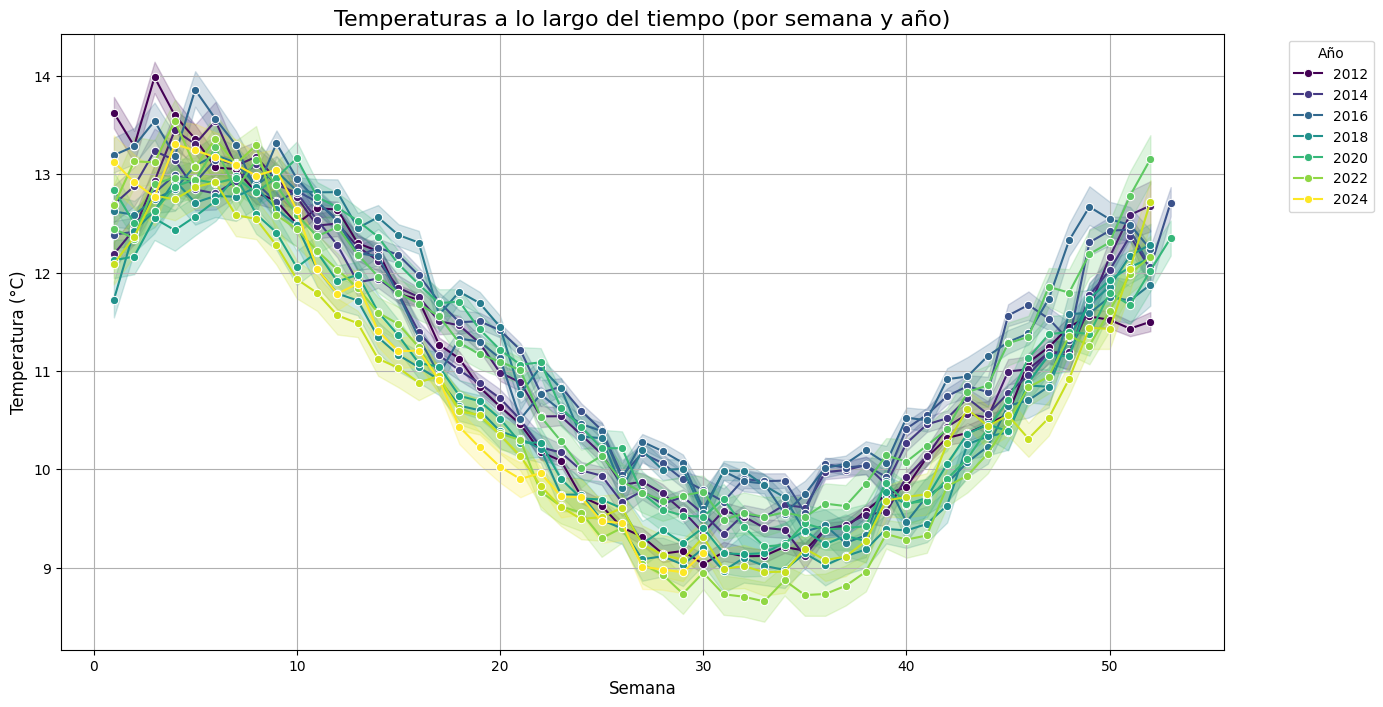

In [24]:
# Crear un gr√°fico de l√≠neas para mostrar todas las temperaturas
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_unificado, x='semana', y='Temperatura', hue='A√±o', palette='viridis', marker='o')

# Configurar etiquetas y t√≠tulo
plt.title('Temperaturas a lo largo del tiempo (por semana y a√±o)', fontsize=16)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Temperatura (¬∞C)', fontsize=12)
plt.legend(title='A√±o', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar el gr√°fico
plt.show()

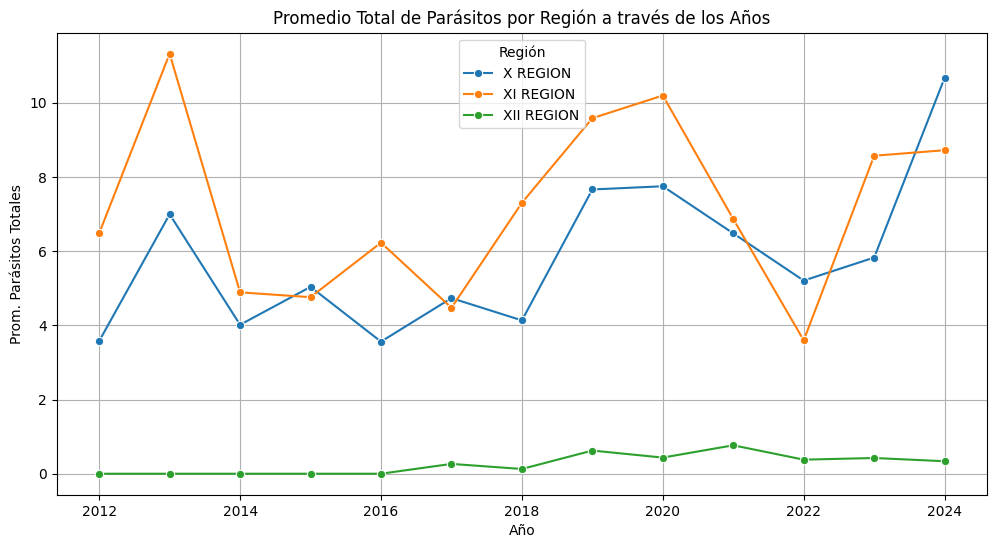

In [25]:
import seaborn as sns
promedios_por_region_anio = df_unificado.groupby(['A√±o', 'Regi√≥n']).agg({
    'Temperatura': 'mean',
    'Prom. Par√°sitos Totales': 'mean'
}).reset_index()
# Crear la gr√°fica
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_region_anio, x='A√±o', y='Prom. Par√°sitos Totales', hue='Regi√≥n', marker='o')

# Configurar etiquetas y t√≠tulo
plt.title('Promedio Total de Par√°sitos por Regi√≥n a trav√©s de los A√±os')
plt.xlabel('A√±o')
plt.ylabel('Prom. Par√°sitos Totales')
plt.legend(title='Regi√≥n')
plt.grid(True)

# Mostrar la gr√°fica
plt.show()

In [26]:
# Calcular estad√≠sticas para Temperatura
min_temperatura = df_unificado['Temperatura'].min()
max_temperatura = df_unificado['Temperatura'].max()
promedio_temperatura = df_unificado['Temperatura'].mean()

# Calcular estad√≠sticas para Salinidad
min_salinidad = df_unificado['Salinidad'].min()
max_salinidad = df_unificado['Salinidad'].max()
promedio_salinidad = df_unificado['Salinidad'].mean()

# Mostrar resultados
print(f"Temperatura - M√≠nimo: {min_temperatura}, M√°ximo: {max_temperatura}, Promedio: {promedio_temperatura:.2f}")
print(f"Salinidad - M√≠nimo: {min_salinidad}, M√°ximo: {max_salinidad}, Promedio: {promedio_salinidad:.2f}")

Temperatura - M√≠nimo: 0.8999999761581421, M√°ximo: 22.5, Promedio: 10.99
Salinidad - M√≠nimo: 0.6999999880790712, M√°ximo: 95.80000305175781, Promedio: 28.26


In [27]:
df_unificado.to_excel('Archivo_Unificado_Limpio.xlsx', index = False)

In [28]:
# Contar elementos que contienen "ACS"
acs_count = df_unificado['ACS'].str.contains('ACS', na=False).sum()

# Contar elementos que no contienen "ACS"
non_acs_count = len(df_unificado) - acs_count

print(f"Elementos con 'ACS': {acs_count}")
print(f"Elementos con otra cosa: {non_acs_count}")

Elementos con 'ACS': 180258
Elementos con otra cosa: 0


MSE: 1.6537648635088607e-13
R¬≤: 0.999999999999999
Coeficientes:
  Prom. Hembras Ov√≠geras: 1.0000000077914502
  Prom. Adultos M√≥viles: 0.9999999915538946
  Prom. Juveniles: 0.9999999997468556
  Temperatura: -1.7486952243498384e-10
  Salinidad: 3.4824335794870443e-10
Intercepto: -3.9268117646429346e-09


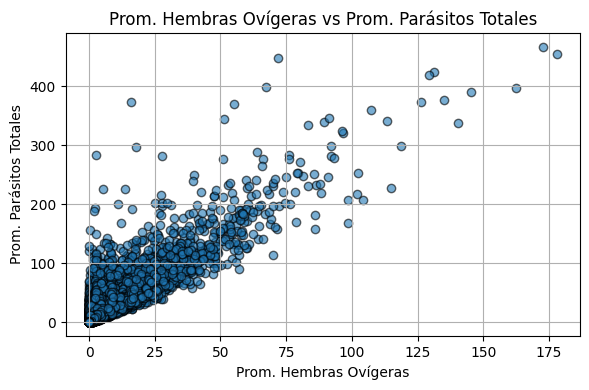

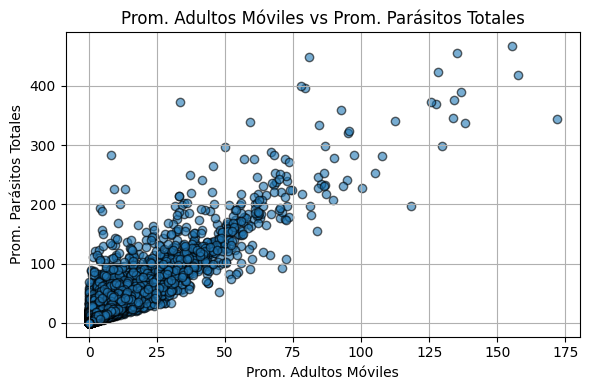

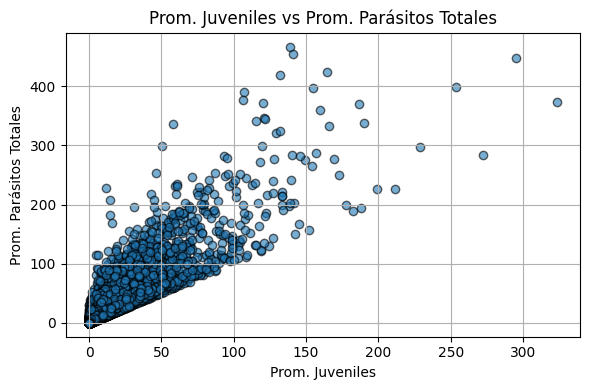

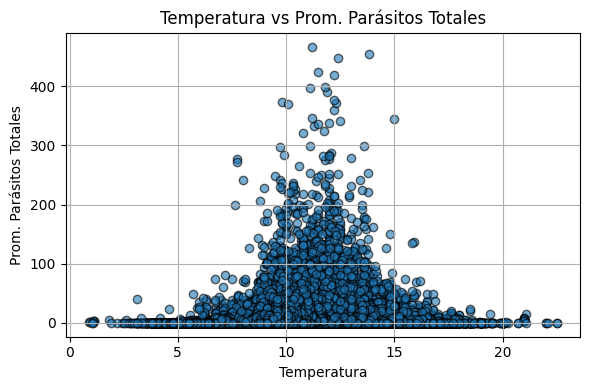

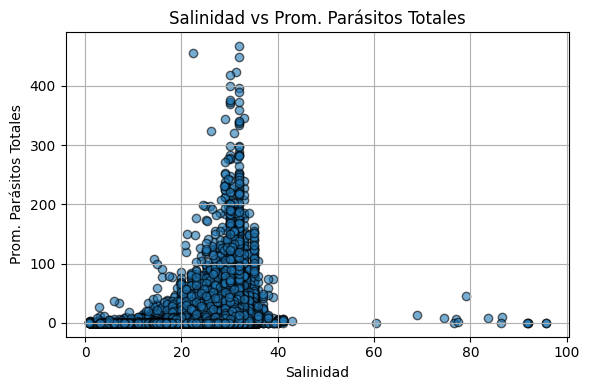

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Definir variables predictoras y objetivo
columnas_usar = [
    'Prom. Hembras Ov√≠geras',
    'Prom. Adultos M√≥viles',
    'Prom. Juveniles',
    'Temperatura',
    'Salinidad'
]
X = df_unificado[columnas_usar]
y = df_unificado['Prom. Par√°sitos Totales']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluaci√≥n
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coeficientes = dict(zip(columnas_usar, modelo.coef_))
intercepto = modelo.intercept_

print("MSE:", mse)
print("R¬≤:", r2)
print("Coeficientes:")
for var, coef in coeficientes.items():
    print(f"  {var}: {coef}")
print("Intercepto:", intercepto)

# Gr√°ficos de dispersi√≥n
for col in columnas_usar:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_unificado[col], df_unificado['Prom. Par√°sitos Totales'], alpha=0.6, edgecolors='k')
    plt.xlabel(col)
    plt.ylabel('Prom. Par√°sitos Totales')
    plt.title(f'{col} vs Prom. Par√°sitos Totales')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [68]:
# Codificar variables categ√≥ricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df_unificado, columns=['Regi√≥n', 'Especie', 'ACS'], drop_first=True)

# Definir variables predictoras (X) y objetivo (y)
X = df_encoded.drop(columns=['Prom. Par√°sitos Totales', 'C√≥digo Centro', 'A√±o', 'semana'])
y = df_encoded['Prom. Par√°sitos Totales']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones y evaluaci√≥n
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("MSE:", mse)
print("R¬≤:", r2)
print("Coeficientes:")
for var, coef in zip(X.columns, modelo.coef_):
    print(f"  {var}: {coef}")
print("Intercepto:", modelo.intercept_)


MSE: 1.6551058077769795e-13
R¬≤: 0.999999999999999
Coeficientes:
  Prom. Hembras Ov√≠geras: 1.0000000077739655
  Prom. Adultos M√≥viles: 0.9999999915120328
  Prom. Juveniles: 0.9999999997565632
  Temperatura: -2.1581217368726868e-10
  Salinidad: 3.639325958648687e-10
  Regi√≥n_XI REGION: 4.683410336631111e-09
  Regi√≥n_XII REGION: -5.383672986580823e-10
  Especie_Salmon Plateado: -4.8556056501947165e-09
  Especie_Salmon Rey: -1.304176984099183e-09
  Especie_Trucha Arcoiris: 1.881676729362236e-09
  ACS_ACS 10 A: 6.2144970471716965e-09
  ACS_ACS 10 B: -1.9514525992966186e-08
  ACS_ACS 11: 2.4858562293847797e-08
  ACS_ACS 11 mod: 4.790385174039541e-10
  ACS_ACS 12 A: -3.507010832345253e-09
  ACS_ACS 12 B: -6.6835197987168225e-09
  ACS_ACS 13: 1.817209347517064e-09
  ACS_ACS 14: -6.548781659180191e-09
  ACS_ACS 15: -7.40163624135667e-09
  ACS_ACS 16: -5.71420027874886e-09
  ACS_ACS 17 A: 3.5253871703399414e-09
  ACS_ACS 17 B: 8.827409865358113e-10
  ACS_ACS 18 A: 8.411887068957187e-09
  AC

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
df = pd.read_excel("Archivo_Unificado_Limpio.xlsx")

# Eliminar nulos
df = df.dropna(subset=[
    'semana', 'A√±o', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ov√≠geras', 'Prom. Adultos M√≥viles',
    'Prom. Juveniles', 'Prom. Par√°sitos Totales'
])

# Usa todo o reduce manualmente si quieres evitar errores de memoria
usar_muestra = False  # cambia a True si tienes errores de memoria

if usar_muestra:
    df = df.sample(n=10000, random_state=42)

# Variables predictoras y objetivo
X = df[['semana', 'A√±o', 'Temperatura', 'Salinidad',
        'Prom. Hembras Ov√≠geras', 'Prom. Adultos M√≥viles', 'Prom. Juveniles']]
y = df['Prom. Par√°sitos Totales']

# Divisi√≥n entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predicci√≥n y evaluaci√≥n
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
importancias = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)

# Resultados
print("MSE:", mse)
print("R¬≤:", r2)
print("\nImportancia de variables:")
print(importancias)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

üì• Cargar datos,
df = pd.read_excel("Archivo_Unificado_Limpio.xlsx")

üßπ Eliminar nulos,
df = df.dropna(subset=[
    'semana', 'A√±o', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ov√≠geras', 'Prom. Adultos M√≥viles',
    'Prom. Juveniles', 'Prom. Par√°sitos Totales'
])

‚úÖ Usa todo o reduce manualmente si quieres evitar errores,
usar_muestra = False  # cambia a True si tienes errores de memoria

if usar_muestra:
    df = df.sample(n=10000, random_state=42)

üéØ Variables predictoras y objetivo,
X = df[['semana', 'A√±o', 'Temperatura', 'Salinidad',
        'Prom. Hembras Ov√≠geras', 'Prom. Adultos M√≥viles', 'Prom. Juveniles']]
y = df['Prom. Par√°sitos Totales']

‚úÇÔ∏è Divisi√≥n entrenamiento/prueba,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

üå≤ Modelo Random Forest,
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

üîÆ Predicci√≥n y evaluaci√≥n,
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
importancias = pd.Series(modelo.featureimportances, index=X.columns).sort_values(ascending=False)

üì§ Resultados,
print("MSE:", mse)
print("R¬≤:", r2)
print("\nImportancia de variables:")
print(importancias)

SyntaxError: invalid character 'üì•' (U+1F4E5) (3081083536.py, line 49)

## Clasificaci√≥n de "Prom. Hembras Ov√≠geras" en bajo, medio y alto usando Random Forest

En esta secci√≥n, categorizaremos la variable "Prom. Hembras Ov√≠geras" en tres clases (bajo, medio, alto) usando terciles, y entrenaremos un modelo Random Forest para predecir estas categor√≠as. Finalmente, visualizaremos la matriz de confusi√≥n para evaluar el desempe√±o del modelo.

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores hiperpar√°metros:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejores hiperpar√°metros:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

        alto       0.88      0.91      0.90     11913
        bajo       0.94      0.92      0.93     12287
       medio       0.83      0.82      0.83     11852

    accuracy                           0.89     36052
   macro avg       0.88      0.88      0.88     36052
weighted avg       0.89      0.89      0.89     36052

              precision    recall  f1-score   support

        alto       0.88      0.91      0.90     11913
        bajo       0.94      0.92      0.93     12287
       medio       0.83      0.82      0.83     11852

    accuracy                           0.89     36052
   macro avg      

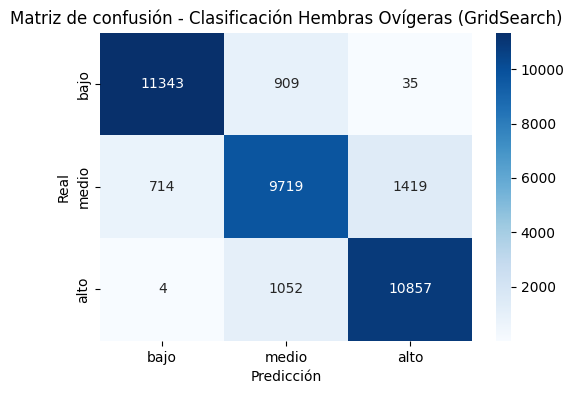

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
# (Si ya tienes df, omite esta l√≠nea)
df = pd.read_excel("Archivo_Unificado_Limpio.xlsx")

# Eliminar nulos relevantes
variables_relevantes = [
    'semana', 'A√±o', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ov√≠geras', 'Prom. Adultos M√≥viles', 'Prom. Juveniles'
]
df = df.dropna(subset=variables_relevantes)

# Clasificar "Prom. Hembras Ov√≠geras" en terciles (bajo, medio, alto)
terciles = df['Prom. Hembras Ov√≠geras'].quantile([1/3, 2/3]).values

def categorizar_hembras(x):
    if x <= terciles[0]:
        return 'bajo'
    elif x <= terciles[1]:
        return 'medio'
    else:
        return 'alto'

# Crear columna categ√≥rica
# Si ya existe la columna, sobreescribir para asegurar consistencia
df['Hem_Ov_Cat'] = df['Prom. Hembras Ov√≠geras'].apply(categorizar_hembras)

# Variables predictoras (sin la variable objetivo)
X = df[['semana', 'A√±o', 'Temperatura', 'Salinidad', 'Prom. Adultos M√≥viles', 'Prom. Juveniles']]
y = df['Hem_Ov_Cat']

# Divisi√≥n entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir la grilla de hiperpar√°metros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV para Random Forest
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Mejores hiperpar√°metros:")
print(grid_search.best_params_)

# Predicci√≥n y evaluaci√≥n con el mejor modelo
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred, labels=['bajo', 'medio', 'alto'])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bajo', 'medio', 'alto'], yticklabels=['bajo', 'medio', 'alto'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de confusi√≥n - Clasificaci√≥n Hembras Ov√≠geras (GridSearch)')
plt.show()

**Interpretaci√≥n:**

- La variable "Prom. Hembras Ov√≠geras" fue categorizada en bajo, medio y alto seg√∫n terciles anuales.
- El modelo Random Forest permite identificar qu√© variables ayudan a predecir la categor√≠a de hembras ov√≠geras.
- La matriz de confusi√≥n y el reporte de clasificaci√≥n muestran el desempe√±o del modelo para cada clase.
- Si el desempe√±o es bajo, se pueden explorar nuevas variables, ajustar hiperpar√°metros o probar otros enfoques.

## Clasificaci√≥n de "Prom. Hembras Ov√≠geras" en bajo, medio y alto usando Random Forest (Hiperpar√°metros por defecto)

En esta secci√≥n, utilizaremos un modelo Random Forest con los hiperpar√°metros por defecto para clasificar la variable "Prom. Hembras Ov√≠geras" en tres clases (bajo, medio, alto) usando terciles. Luego, compararemos los resultados con el modelo ajustado previamente.

              precision    recall  f1-score   support

        alto       0.88      0.91      0.90     11913
        bajo       0.94      0.92      0.93     12287
       medio       0.83      0.82      0.82     11852

    accuracy                           0.88     36052
   macro avg       0.88      0.88      0.88     36052
weighted avg       0.88      0.88      0.88     36052



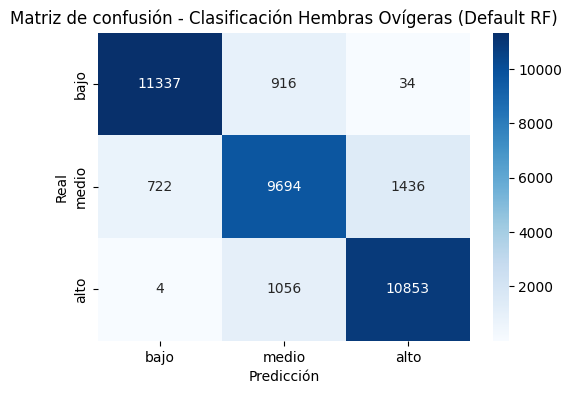

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
# (Si ya tienes df, omite esta l√≠nea)
df = pd.read_excel("Archivo_Unificado_Limpio.xlsx")

# Eliminar nulos relevantes
variables_relevantes = [
    'semana', 'A√±o', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ov√≠geras', 'Prom. Adultos M√≥viles', 'Prom. Juveniles'
]
df = df.dropna(subset=variables_relevantes)

# Clasificar "Prom. Hembras Ov√≠geras" en terciles (bajo, medio, alto)
terciles = df['Prom. Hembras Ov√≠geras'].quantile([1/3, 2/3]).values

def categorizar_hembras(x):
    if x <= terciles[0]:
        return 'bajo'
    elif x <= terciles[1]:
        return 'medio'
    else:
        return 'alto'

# Crear columna categ√≥rica
df['Hem_Ov_Cat'] = df['Prom. Hembras Ov√≠geras'].apply(categorizar_hembras)

# Variables predictoras (sin la variable objetivo)
X = df[['semana', 'A√±o', 'Temperatura', 'Salinidad', 'Prom. Adultos M√≥viles', 'Prom. Juveniles']]
y = df['Hem_Ov_Cat']

# Divisi√≥n entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo Random Forest con hiperpar√°metros por defecto
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicci√≥n y evaluaci√≥n
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred, labels=['bajo', 'medio', 'alto'])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bajo', 'medio', 'alto'], yticklabels=['bajo', 'medio', 'alto'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de confusi√≥n - Clasificaci√≥n Hembras Ov√≠geras (Default RF)')
plt.show()

## Random Forest Regressor con GridSearchCV para predecir par√°sitos totales por regi√≥n y condiciones ambientales

En esta secci√≥n, se implementa un modelo Random Forest Regressor para predecir la cantidad de par√°sitos totales usando todas las variables relevantes, incluyendo regi√≥n, especie, temperatura y salinidad. Se utiliza GridSearchCV para optimizar los hiperpar√°metros y se reportan los resultados y la importancia de variables.

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Mejores hiperpar√°metros:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejores hiperpar√°metros:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 0.56
R¬≤: 0.996

Importancia de variables:
Prom. Adultos M√≥viles      0.608930
Prom. Juveniles            0.339447
Prom. Hembras Ov√≠geras     0.049385
semana                     0.000578
Temperatura                0.000341
Salinidad                  0.000253
ACS_ACS 10 B               0.000201
A√±o                        0.000201
Regi√≥n_XI REGION           0.000153
ACS_ACS 18 A               0.000130
ACS_ACS 20                 0.000062
Especie_Trucha Arcoiris    0.000036
ACS_ACS 34                 0.000033
ACS_ACS 30 A               0.000024
ACS_ACS 18 C               0.000023
dtype: float64
MSE: 0.56
R¬≤: 0.996

Importancia de variables:
Prom. Adultos M√≥v

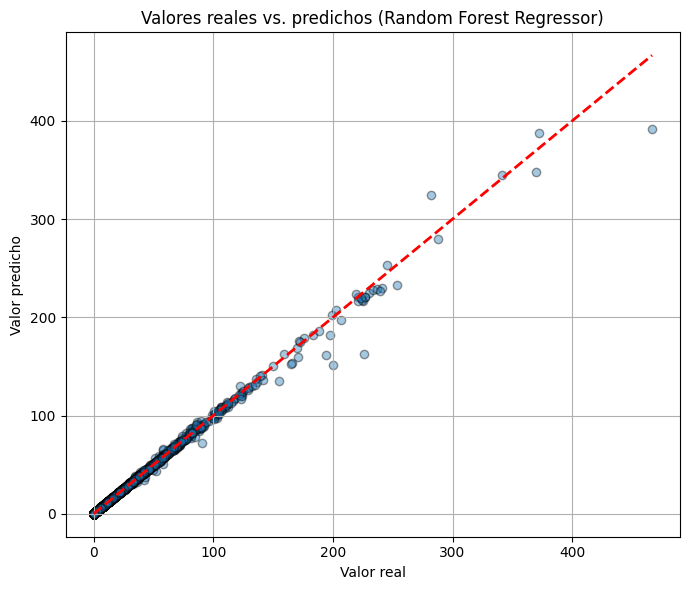

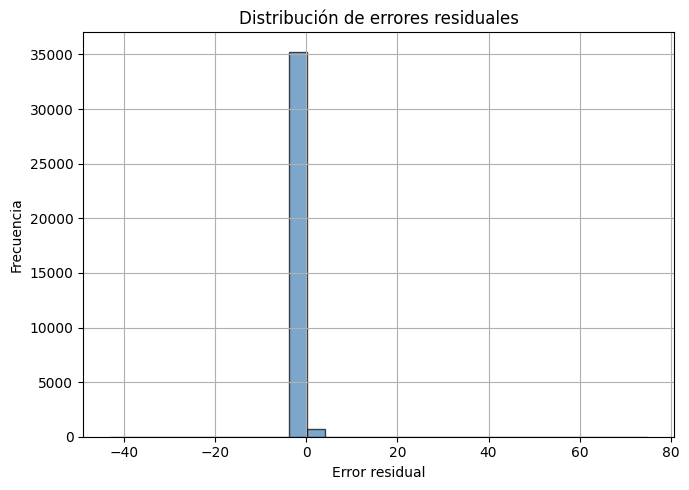

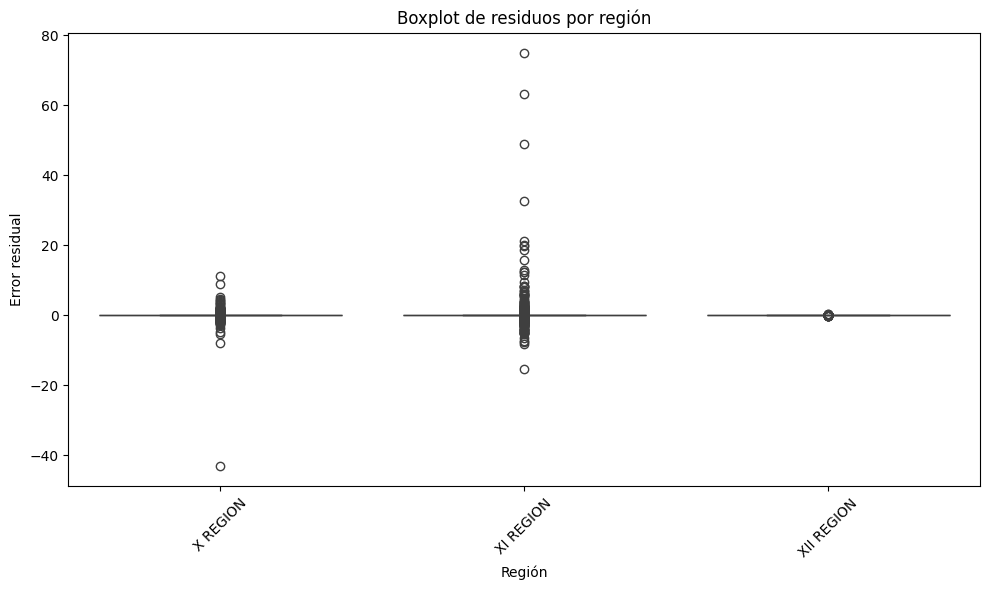

C:\Users\nicoa\AppData\Local\Temp\ipykernel_21464\4061309023.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=importancias.index, palette='viridis')


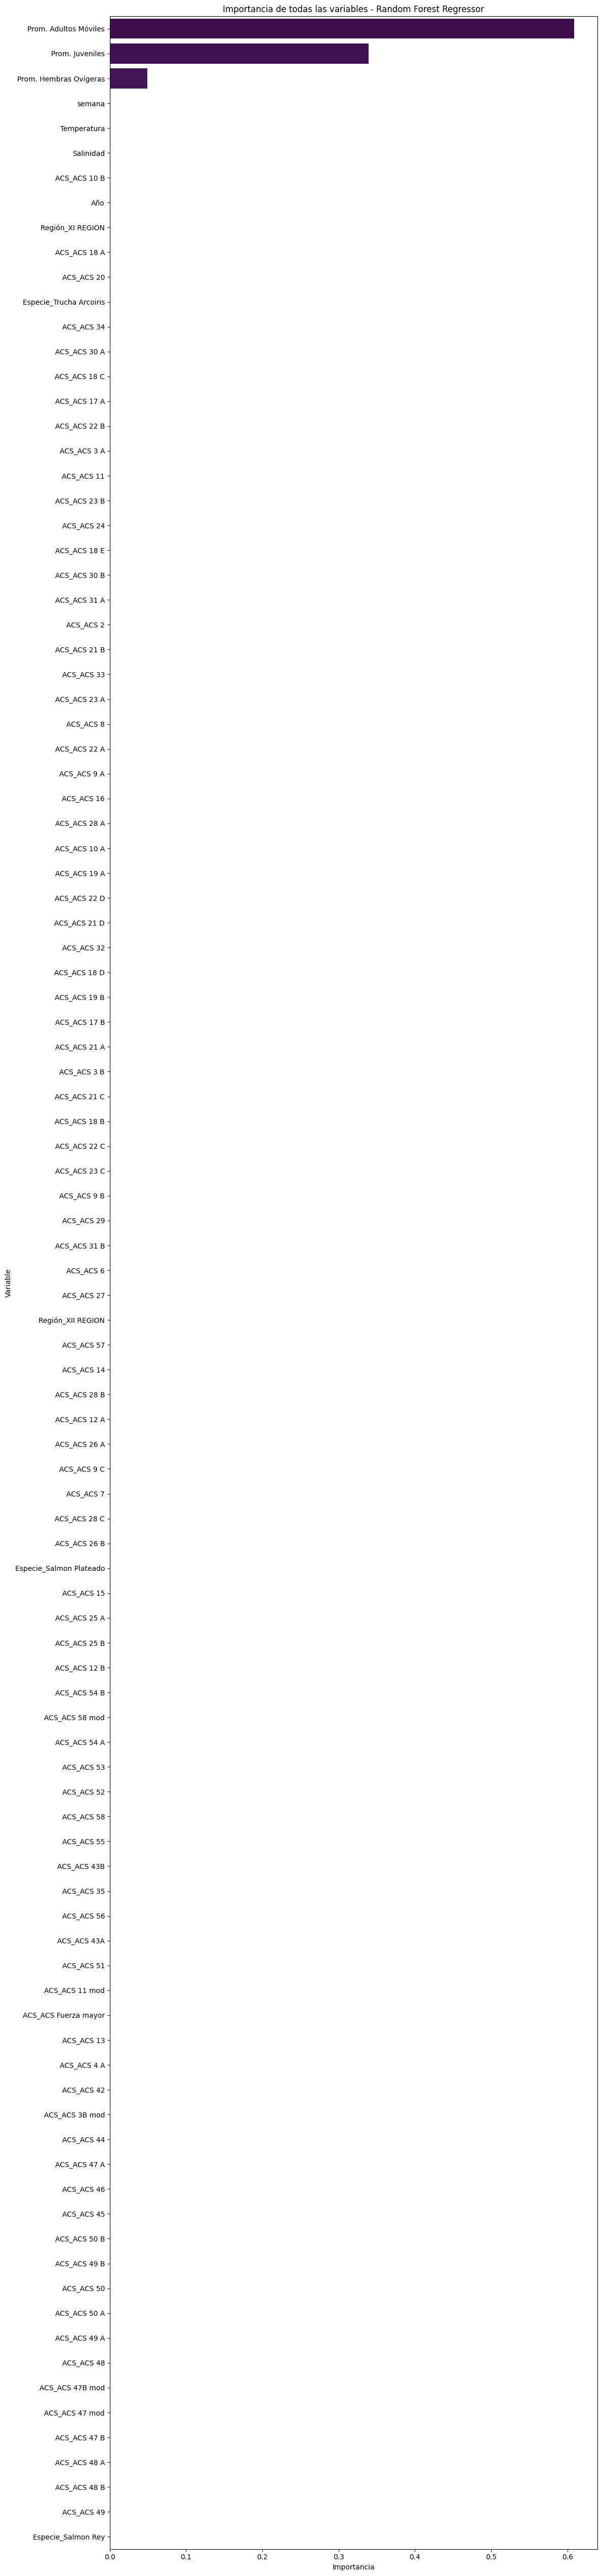

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
ruta = "Archivo_Unificado_Limpio.xlsx"
df = pd.read_excel(ruta)

# Eliminar filas con nulos en las variables relevantes
variables_relevantes = [
    'semana', 'A√±o', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ov√≠geras', 'Prom. Adultos M√≥viles', 'Prom. Juveniles',
    'Regi√≥n', 'Especie', 'Prom. Par√°sitos Totales'
]
df = df.dropna(subset=variables_relevantes)

# OPCIONAL: usar una muestra del dataset para acelerar (descomentar si es necesario)
# df = df.sample(n=5000, random_state=42)  # Usa solo 5000 filas

# Codificar variables categ√≥ricas
X = pd.get_dummies(df.drop(columns=['Prom. Par√°sitos Totales', 'C√≥digo Centro']), drop_first=True)
y = df['Prom. Par√°sitos Totales']

# Divisi√≥n entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Grilla reducida para GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=2, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Mejores hiperpar√°metros:")
print(grid_search.best_params_)

# Evaluaci√≥n del mejor modelo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R¬≤: {r2:.3f}")

# Importancia de variables
importancias = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancia de variables:")
print(importancias.head(15))

# --- Visualizaciones ---
# 1. Dispersi√≥n de valores reales vs. predichos
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Valores reales vs. predichos (Random Forest Regressor)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Histograma de errores residuales
residuos = y_test - y_pred
plt.figure(figsize=(7, 5))
plt.hist(residuos, bins=30, color='steelblue', edgecolor='k', alpha=0.7)
plt.xlabel('Error residual')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de errores residuales')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Boxplot de residuos por regi√≥n (si la variable existe en el test set)
if 'Regi√≥n' in df.columns:
    test_idx = y_test.index
    regiones_test = df.loc[test_idx, 'Regi√≥n']
    df_box = pd.DataFrame({'Regi√≥n': regiones_test, 'residuo': residuos})
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Regi√≥n', y='residuo', data=df_box)
    plt.title('Boxplot de residuos por regi√≥n')
    plt.xlabel('Regi√≥n')
    plt.ylabel('Error residual')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Importancia de todas las variables
plt.figure(figsize=(12, max(6, int(len(importancias)/2))))
sns.barplot(x=importancias, y=importancias.index, palette='viridis')
plt.title('Importancia de todas las variables - Random Forest Regressor')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

In [ ]:
# Reducci√≥n de la grilla de hiperpar√°metros para acelerar GridSearchCV
# Se reduce la cantidad de combinaciones y se puede usar una muestra del dataset si es necesario

# OPCIONAL: usar una muestra del dataset para acelerar (descomentar si es necesario)
# df = df.sample(n=5000, random_state=42)  # Usa solo 5000 filas

# Nueva grilla reducida
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

# Configurar y ejecutar GridSearchCV con la grilla reducida
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=2, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Mejores hiperpar√°metros (grilla reducida):")
print(grid_search.best_params_)

# Evaluaci√≥n del mejor modelo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(y_test.index)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R¬≤: {r2:.3f}")

# Importancia de variables
importancias = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancia de variables:")
print(importancias.head(15))

# Visualizaci√≥n de importancia de variables
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias.head(15), y=importancias.head(15).index, palette='viridis')
plt.title('Top 15 Importancias de Variables - Random Forest Regressor (grilla reducida)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

Fitting 2 folds for each of 1 candidates, totalling 2 fits
